# IFN619 Assessment2-stream-B-Insight Report
### Name: LI JEN SHAO(N11096837)

### What can we tell from personel income prediction with social economic conditions?  
In assessment2, I would like to analyse a dataset from United States Census Bureau, the data was extracted from US government department website so I think it's safe enough and reliable. It is a data with 32561 samples and 15 features, by predicting the "salary" column(whether annual income is <=50K or >50K) I want to figure out what kind of features they have in common, is race, sex or education really matter to personel income, can we dig out part of the background story of a person by the data, the 15 features represent social economic conditions of each sample such as education, occupation, race etc.

Here are the feature descriptions:  
**0:age**  
**1:workclass**(State-gov, Self-emp-not-inc, Private, Federal-gov, Local-gov, Self-emp-inc, Without-pay, Never-worked)  
**2:fnlwgt(final weight)** = It is a synthetic feature controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly by Population Division at the Census Bureau. It use 3 sets of controls, which are:  
    a. A single cell estimate of the population 16+ for each state.  
    b. Controls for Hispanic Origin by age and sex.  
    c. Controls by Race, age and sex.  
    They use all three sets of controls in the weighting program and "rake" through them 6 times so that by the end it come back to all the controls we     used, People with similar demographic characteristics should have similar weights.  
  **3:education**(Bachelors, HS-grad, 11th, Masters, 9th, Some-college, Assoc-acdm, Assoc-voc, 7th-8th, Doctorate, Prof-school, 5th-6th, 10th, 1st-4th,         Preschool, 12th)  
  **4:education-num**  
  **5:marital-status**(Never-married, Married-civ-spouse, Divorced, Married-spouse-absent, Separated, Married-AF-spouse, Widowed)  
  **6:occupation**(Adm-clerical, Exec-managerial, Handlers-cleaners, Prof-specialty, Other-service, Sales, Craft-repair, Transport-moving, Farming, fishing, Machine-op-inspct, Tech-support, Protective-serv, Armed-Forces, Priv-house-serv)  
  **7:relationship**(Not-in-family, Husband, Wife, Own-child, Unmarried, Other-relative)  
  **8:race**(White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other)  
  **9:sex**(Male, Female)  
  **10:capital-gain**  
  **11:capital-loss**  
  **12:hours-per-week**  
  **13:native-country**(United-States, Cuba, Jamaica, India, Mexico, South Korea, Puerto-Rico, Honduras, England, Canada, Germany, Iran, Philippines, Italy, Poland, Columbia, Cambodia, Thailand, Ecuador, Laos, Taiwan, Haiti, Portugal, Dominican-Republic, El-Salvador, France, Guatemala, China, Japan, Yugoslavia, Peru, Outlying-US(Guam-USVI-etc), Scotland, Trinadad&Tobago, Greece, Nicaragua, Vietnam, Hong Kong, Ireland, Hungary, Holand-Netherlands)  
  **14:salary(<=50K, >50K)**
  
I believe this analysis can be highly relevant for such as social sciencies studies, humanitities studies, potencial charitable contributor recognition or other aspects that related to social inequality and human behavior. A very important point here, we only labeling people for computational analysis purpose, do not labeling people in normal life, each sample here are actually a humanbeing in real world.  

## Analysis

In [1]:
!pip install imblearn # Install imbalanced learning package. 

In [2]:
# These are the packages we can use later.
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot

from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, Flatten, Conv2D, MaxPool2D,  Conv3D, MaxPool3D,Input
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import RandomUniform

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model
from tensorflow.python.keras import regularizers
from keras import regularizers
from keras.regularizers import l2

from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import statistics as stat

from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler,LabelEncoder

import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras import metrics
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.initializers import glorot_uniform

import lime
from imblearn.under_sampling import RandomUnderSampler # We will use RandomUnderSampler later.

In [3]:
import pandas as pd # First we read the data, we have 32561 samples and 15 columns.

df = pd.read_csv("adult_data.csv", na_filter=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# From data info we know that there are space name problem, have to remove space before more preprocessing.
df.rename(columns = {' workclass': 'workclass', ' fnlwgt': 'fnlwgt', " education":"education", " education-num":"education_num",
                          " marital-status":"marital_status", " occupation":"occupation", " relationship":"relationship", " race":"race",
                           " sex":"sex", " capital-gain":"capital_gain", " capital-loss":"capital_loss", " hours-per-week":"hours_per_week",
                          " native-country":"native_country", " salary":"salary"}, inplace = True)

# We drop "education" because "education_num" column is already a quantized education. 
# Drop "native_country" because the value are almost the same so it's miningless.
# Drop fnlwgt(final weight) because according to the discription and data observation, although it's numeric but the values are actually non-ordinal,
# similar group of people would get similar weight, it doesn't have the meaning like this person is doctor so he has higher value, 
# if we can't standerdize it, I prefer not to use it.
df.drop(["fnlwgt", "education", "native_country"], inplace=True, axis=1)

# Remove missing values, there are only few.
df = df[df.workclass != " ?"]
df = df[df.occupation != " ?"]

# Map ordinal categorical column.
salary_map = {" <=50K":0, " >50K":1}
df["salary"] = df["salary"].map(salary_map)

# One hot encoding non ordinal categorical data.
df = pd.get_dummies(df, columns = ['workclass', 'marital_status', 'occupation','relationship','race','sex']) 

# Split target variable, we want to predict salary here.
X_df = df.drop("salary", axis=1) 
y_df = df["salary"]
y_df.value_counts() # We still have 30718 samples, very good, but we have data imbalanced problem.

0    23068
1     7650
Name: salary, dtype: int64

In [5]:
# We use random under sampler to under sampling data.
RUS = RandomUnderSampler()
X_ru, y_ru = RUS.fit_resample(X_df, y_df)

# Standerize our dataframe except of target variable, it will return a numpy array.
scaler = MinMaxScaler()
X = scaler.fit_transform(X_ru)

# One hot encoding target variable since classification neural network needs at least 2 dimension target input.
# And put it in numpy array.
enc = OneHotEncoder()
y = enc.fit_transform(y_ru[:, np.newaxis]).toarray()

# It seems float datatype input are better for neural network.
# After undersampling we have 15300 samples now, and RandomUnderSampler() will put target value "0" in first half dataframe, value "1" to second half.
# But it doesn't matter here.
X.astype('float64')
y.astype('float64')
print(len(X_ru), len(y_ru))
print(y_ru[:10], y_ru[15290:])

15300 15300
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: salary, dtype: int64 15290    1
15291    1
15292    1
15293    1
15294    1
15295    1
15296    1
15297    1
15298    1
15299    1
Name: salary, dtype: int64


In [6]:
from keras import regularizers
# Split to train, validation, test data.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state = 42)

# We set early stopping if model doesn't has improvement after 30 iterations.
early_stop = EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='min')
callbacks_list = [early_stop]

# define the Machine Learning Model: Neural Network
model = Sequential()

# This is the best hyperparameters I can get so far, we have 46 columns after data pre-processing. 
# Here we use weight regularization and dropout to prevent overfitting.
model.add(Dense(15, input_dim= 46, activation='tanh',kernel_regularizer=regularizers.l2(0.000001)))
model.add(Dropout(0.3))
model.add(Dense(10, activation='tanh', kernel_regularizer=regularizers.l2(0.000001)))
model.add(Dropout(0.3))
model.add(Dense(5, activation='tanh', kernel_regularizer=regularizers.l2(0.000001)))
model.add(Dropout(0.3))
model.add(Dense(2, activation='sigmoid')) # Input layer are two dimensions because we are doing binary classification.

# Compile the network using binary_crossentropy since we are doing a binary classification problem. 
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.summary()

# Fit model, we set 100 times iteration limits here.
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=120, verbose=1,  callbacks = callbacks_list)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                705       
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1

In [7]:
# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=1)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
print('Train: %.3f, Test: %.3f' % (train_loss, test_loss))

72/72 [==============================] - 0s 1ms/step - loss: 0.4036 - accuracy: 0.8122
Train: 0.820, Test: 0.812
Train: 0.388, Test: 0.404


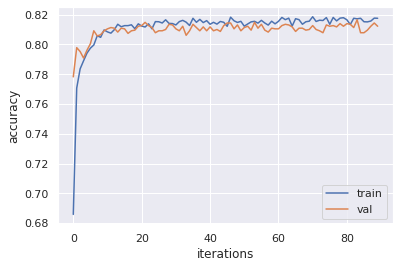

In [8]:
# Plot training history, the accuracy learning curve are not too bad.
metric = "accuracy"
pyplot.plot(history.history[metric], label='train')
pyplot.plot(history.history["val_" + metric], label='val')
pyplot.ylabel('accuracy', fontsize=12)
pyplot.xlabel('iterations', fontsize=12)
pyplot.legend()
pyplot.show()

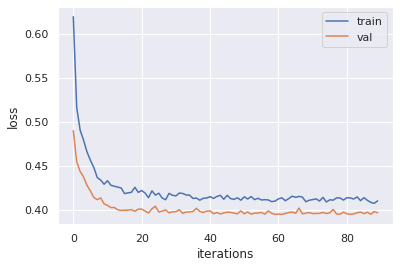

In [9]:
# Plot loss history, the loss learning curve are good.
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.ylabel('loss', fontsize=12)
pyplot.xlabel('iterations', fontsize=12)
pyplot.legend()
pyplot.show()

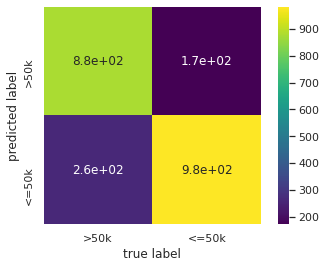

In [10]:
# Make a confusion matrix to evaluate the prdiction result, not too bad.
from sklearn.metrics import confusion_matrix
from matplotlib import cm

groundtruth = enc.inverse_transform( y_test )
predictions = enc.inverse_transform( model.predict( X_test ) )
classes=['>50k', '<=50k']
mat = confusion_matrix(groundtruth, predictions)
sns.heatmap(mat.T, square=True, cbar=True,
          annot=True, cmap=cm.viridis, xticklabels=classes,yticklabels=classes)

plt.xlabel('true label')
plt.ylabel('predicted label');

In [11]:
# Compare model prediction and true answer to see the correctness of each sample, make sure we have 4 kinds of predictions like confusion matrix.
for adult_indx in range(0, 20):

    adult_feat = X[adult_indx,:]
    adult_true_pred = enc.inverse_transform(np.expand_dims(y[adult_indx,:], 0))[0][0]

    # prediction
    pred = model.predict(np.expand_dims(adult_feat, 0))
    pred = enc.inverse_transform( pred )[0][0]

    print("adult id: %d \t Predicted: %s \t True prediction: %s\n" 
      %(adult_indx, ">50K" if pred else "<=50K", ">50K" if adult_true_pred else "<=50K"))

adult id: 0 	 Predicted: <=50K 	 True prediction: <=50K

adult id: 1 	 Predicted: <=50K 	 True prediction: <=50K

adult id: 2 	 Predicted: <=50K 	 True prediction: <=50K

adult id: 3 	 Predicted: <=50K 	 True prediction: <=50K

adult id: 4 	 Predicted: <=50K 	 True prediction: <=50K

adult id: 5 	 Predicted: <=50K 	 True prediction: <=50K

adult id: 6 	 Predicted: >50K 	 True prediction: <=50K

adult id: 7 	 Predicted: <=50K 	 True prediction: <=50K

adult id: 8 	 Predicted: <=50K 	 True prediction: <=50K

adult id: 9 	 Predicted: >50K 	 True prediction: <=50K

adult id: 10 	 Predicted: <=50K 	 True prediction: <=50K

adult id: 11 	 Predicted: <=50K 	 True prediction: <=50K

adult id: 12 	 Predicted: <=50K 	 True prediction: <=50K

adult id: 13 	 Predicted: >50K 	 True prediction: <=50K

adult id: 14 	 Predicted: <=50K 	 True prediction: <=50K

adult id: 15 	 Predicted: <=50K 	 True prediction: <=50K

adult id: 16 	 Predicted: <=50K 	 True prediction: <=50K

adult id: 17 	 Predicted: <

In [12]:
feature_names = df.columns.to_list()
feature_names.remove("salary")

In [13]:
# Use lime to look closer at each sample, we can find some stories here.
import lime
from lime import lime_tabular

In [14]:
# LIME has one explainer for all the models
explainer = lime_tabular.LimeTabularExplainer(X_train, feature_names= feature_names, 
                                                  class_names=["<=50k", ">50k"], verbose=False, mode='classification')

In [15]:
MAX_FEAT = 46

In [16]:
# We take a look at some false negative samples to understand what kind of features they have in common.
# We only look at those samples with prediction probabilities over 0.80 in order to get pure result.
adult_indx = 153

adult_feat = X[adult_indx,:]
adult_true_pred = enc.inverse_transform(np.expand_dims(y[adult_indx,:], 0))[0][0]

# prediction
pred = model.predict(np.expand_dims(adult_feat, 0))
pred = enc.inverse_transform( pred )[0][0]

print("Patient id: %d \t Predicted: %s \t True Diagnosis: %s\n" 
      %(adult_indx, ">50K" if pred else "<=50k", ">50k" if adult_true_pred else "<=50k"))

Patient id: 153 	 Predicted: <=50k 	 True Diagnosis: <=50k



In [17]:
# explain instance
exp = explainer.explain_instance(adult_feat, model.predict_proba, num_features= MAX_FEAT )

In [18]:
# Show the predictions
exp.show_in_notebook(show_table=True)

In [19]:
exp.as_list()

[('capital_gain <= 0.00', -0.47910398145389166),
 ('occupation_ Priv-house-serv <= 0.00', 0.4639023420037966),
 ('sex_ Female <= 0.00', 0.26119793960124926),
 ('relationship_ Own-child > 0.00', -0.23702614400534217),
 ('marital_status_ Married-AF-spouse <= 0.00', -0.2352885543730045),
 ('marital_status_ Never-married > 0.00', -0.23115493406632978),
 ('occupation_ Farming-fishing <= 0.00', 0.21767162280722635),
 ('relationship_ Husband <= 0.00', 0.1932537708039268),
 ('occupation_ Other-service <= 0.00', 0.19162919013637567),
 ('marital_status_ Separated <= 0.00', 0.1843373152335368),
 ('marital_status_ Widowed <= 0.00', 0.1741396020561823),
 ('occupation_ Handlers-cleaners <= 0.00', 0.1696989577201316),
 ('relationship_ Other-relative <= 0.00', 0.15608406368398514),
 ('race_ Other <= 0.00', 0.1493215104248536),
 ('capital_loss <= 0.00', -0.14120811679127243),
 ('marital_status_ Married-spouse-absent <= 0.00', 0.13787344222056194),
 ('marital_status_ Divorced <= 0.00', 0.133732564195152

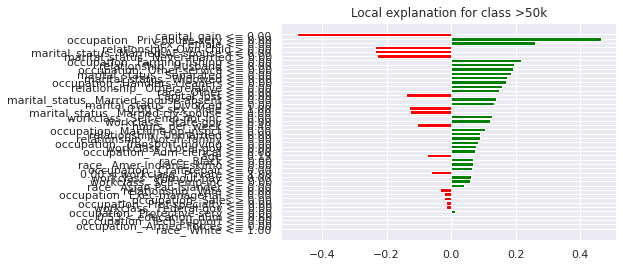

In [20]:
explanation_plot = exp.as_pyplot_figure()

In [21]:
# We take a look at 100 True positive samples to understand what kind of features they have in common.
# We only look at those samples with prediction probabilities over 0.80 in order to get pure result.
adult_indx = 15123

adult_feat = X[adult_indx,:]
adult_true_pred = enc.inverse_transform(np.expand_dims(y[adult_indx,:], 0))[0][0]

# prediction
pred = model.predict(np.expand_dims(adult_feat, 0))
pred = enc.inverse_transform( pred )[0][0]

print("Patient id: %d \t Predicted: %s \t True Diagnosis: %s\n" 
      %(adult_indx, ">50K" if pred else "<=50k", ">50k" if adult_true_pred else "<=50k"))

Patient id: 15123 	 Predicted: >50K 	 True Diagnosis: >50k



In [ ]:
# explain instance
exp = explainer.explain_instance(adult_feat, model.predict_proba, num_features= MAX_FEAT )

In [ ]:
# Show the predictions
exp.show_in_notebook(show_table=True)

In [ ]:
exp.as_list()

In [ ]:
explanation_plot = exp.as_pyplot_figure()

## Insights: What can we tell from the data?

To analyse this data, I want to combine what we found in the model with some life experience, to make a conclusion of why these people's annual incomes are less than 50K or over 50K? Also, can this dataset reflect some of the internal issues of american society? By using the features we have in this dataset, this analysis may not be very comprehensive, we can still tell some stories from it.  
We used LIME to help us to explain the prediction of neural network, and take a closer look to see what features they have in 100 samples each in annual income less and over than 50K, We only look at those samples with prediction probabilities over 0.80 in order to get pure result, then count each feature's frequency of occurrence, the result is quite interesting, you can see the below.  



#### Question: What differences do we have between people who have annual income less or greater than 50K?

<img src="age.PNG" />  <img src="race.PNG" />  
<img src="sex.PNG" />

First of all, we take a look at Age, Race and Sex, the graph shows that even we only picked 100 smaples each, the distribution already told us a different story. We have lots of young people and teenagers in the group of <=50K, on the other hand in the >50K group, most of them are young adults and middle aged. In American society, caucasian is the majority, so we have a lot of White people in our race feature, the interesting point is in <=50K group we also have some black people but in >50K group there are only very few of them left, most of people who have income over 50K are white, we can't tell what situation is Asian and pacific-Islander and American Indian people since we didn't count enough data. Next one is sex, in <=50K group we have both sex but in >50K group is very imbalanced, male is the very big proportion in here. We found these three features should have something to do with income.  

<img src="marital-status.PNG" />  <img src="relationship.PNG" />

Secondly let's look at interpersonal relations. In <=50K group we have lots of people who are never-married and some people are divorced, meaning most of them are single, on the other hand most of people in >50K group are Married. If we look further, in relationship feature we have about one third of people who own child but haven't got married, which is very unhealthy, most of the people in >50K group are husband and wife, means they are normal family but male is still very big proportion of it.

<img src="education.PNG" /> 

Thirdly let's look at education, this is a quantized feature, it means the higher the score the person gets, the higher education the person is educated. The distribution here is also very different, we can see in <=50K group, most of the samples are distributed in the middle area, we have few samples higher than 0.60 but never over 0.80, and also we have few are under 0.53. On the other hand, in the >50K group lots of samples are distributed in high score areas, and we only have very few samples below 0.53, so education definitely has something to do with income.

<img src="occupation.PNG" />  <img src="workclass.PNG" />   
<img src="hoursperweek.PNG" /> 

Next one is jobs. In the Occupation feature it also shows a different distribution between <=50K group and >50K group, we have every kind of occupation in <=50K group, while most of the people in >50K group are managers and professional specialties. In the Workclass feature there are lots of people who are working in private companies, but people who own their business in >50K group are more than <=50K group. Last one is working hours, we know that 40 hours per week is basic, here people who have higher income seem more hardworking, on the other hand we also have half the proportion of people who work less than 40 hours per week in <=50K group.

<img src="capital.PNG" />

Last one is personal investment. It shows a very different story, of course not everybody has investment but in <=50K group we only have very few people who have investment, while in >50K group people who have investment are apparently more.

#### Question: Can this dataset reflect some of the internal issues in American society?

I would say definitely, it seems every feature here has something to do with income, to answer this question I have to combine some life experience with this analysis. We start with age feature, age distributed like that because human nature, people with older age means they have more time to make achievements in their life so they have a bigger chance to have higher income, people who are less than 20 years old are still learning in school, they don't get much time on earning income. Race is a very sensitive issue but I have to say, from this dataset it reflects racial inequality issue in America, according to US population data, 80% are white and 12% are black, in here we only see that only very few black people have income greater than 50K, the ratio is disproportional. Also in sex feature, when the income is greater than 50K, most of the people are male, it also reflects gender inequality issue in America.    
  
From interpersonal relations(marital-status and relationship), most of people in >50K group are married but male(gender inequality again), and most of people in <=50K group are single, some of them divorced, and some of them are single but own child, it reflects teenager issues in American society, people with less income have higher divorce rate, and a healthy interpersonal relations can be related to more income.  
  
Let's also talk about education. In America the average university one year tuition is about 36K dollars, the bachelor's average annual salary is 64.5K, the high school graduated person's annual salary is about 41K dollars, which means the more education the person gets, the higher income the person gets. But the tuition is so expensive that some families can't afford it, education in America is a door that only people with a certain amount of wealth can walk in.  

Also about jobs, big proportion of people in >50K group are manager or professional specialty, this also related to education I think, a good education gives you professional skills, makes you more competitive, also from working hours tells us that people with income greater than 50K are hardworking, some of them work over 40 hours per week, basically have 40 hours per week. About half of <=50K group work less than 40 hours per week, it could be the reason why they don't get much income, and we don't know the reason behind it by just looking at the numbers.  

Finally the investment, it is a reason to make income higher because successful investment can make additional income, but investment is like rolling a snowball, it can make the wealth gap bigger and raise the income inequality issue. 

#### What can decision tree feature importance tell us?

<img src="dt.PNG" />

I also made a decision tree model with optimal hyperparameters to do this classification prediction, the accuracy is about 0.85, which is quite good. This feature importance can tell us what the decision tree model thinks which feature is important to the result, it represents the whole dataset, while LIME tells us feature importance of each sample in the dataset. These two model's may have found the same pattern from the dataset but the prediction representations are different. From this feature importance it tells us that healthy marital status, age, education, capital investment and working hours are actually some really important features to the result of income less or greater than 50K, this conclusion basicly matches the result we got by neural network plus LIME.

#### Conclusion

I just realised that this dataset is actually from year of 1994 when finished analysis, I came up with black lives matter movement and Me too movement, we won't talk about how these movements purpose become bias, but since there are people who's still focusing on these issues, it means these social problem was never been solved these years. When I were counting these feature numbers with LIME's help, I also found some pattern such as young people who never married but own child with income less than 50K, young people with less than 40 working hours per week(I assume they are students), young adult and middle age white male who is married with high education number and income greater than 50K, people with income greater than 50K also have investment, people who is manager or professional specialty are more often with income greater than 50K etc. Just from these features I can already imagine a person's background.  
If we want to go further for these social inequality issues, it can related to history, economic, politics and other aspects, so I just want to point out that wealth accumulates by generation after generation, most of the time good income makes good family background and leads to good education, good education also come back to good income, it is a virtuous cycle. In another hand, low income can be a reason for bad family background, and leads to bad education, education brings back low income issue, it becomes a vicious cycle. So the real issue is how to break the cycle of poverty, in the past days we also had external oppression reason such as apartheid and racism, nowadays people are still fighting against inequality, it is very frustrating when you know education may be a way of salvation but still struggling for next month's house rent, or as a female and knowing male has more chance to get higher occupation, or even get bullying just because you have different skin colour or culture background. To solve these issues we not only need our efforts, but also need the government to do something on administration, legislation and education.